<a href="https://colab.research.google.com/github/Pushkar1-GitHub/AI-in-Biology/blob/main/Copy_of_Lasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Key risk factors identified by Lasso Regression:
['BMI' 'Age' 'Smoking' 'Cholesterol' 'FamilyHistory' 'SugarIntake']


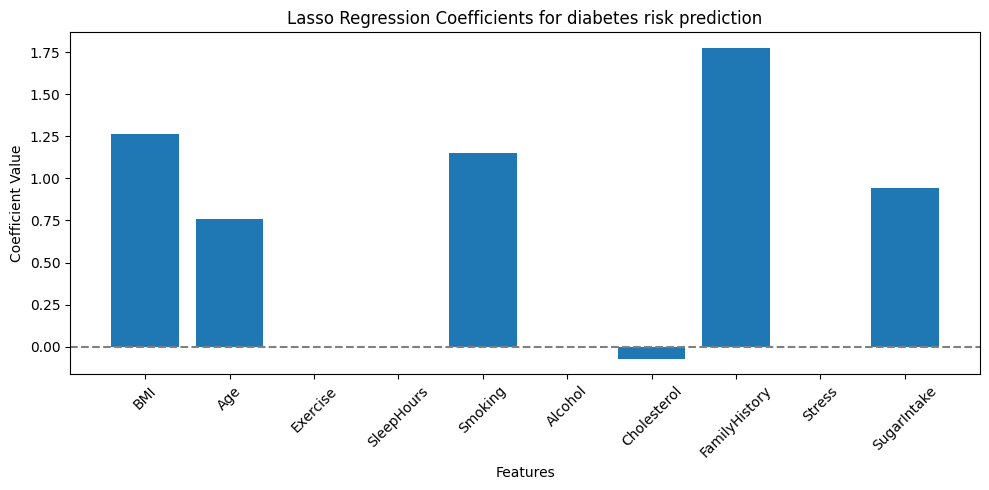

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Example: Simulated LifeStyle data
np.random.seed(42)
n_samples=100
n_features=10

# Simulated LifeStyle metrics
X = pd.DataFrame(np.random.randn(n_samples, n_features), columns=['BMI', 'Age', 'Exercise', 'SleepHours', 'Smoking', 'Alcohol', 'Cholesterol', 'FamilyHistory', 'Stress', 'SugarIntake'])

# Simulated Diabetes Risk Score
true_coefs = np.array([1.5, 0.8, 0, 0, 1.2, 0, 0, 2.0, 0, 1.0])
y = X @ true_coefs + np.random.randn(n_samples) * 0.5

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Lasso with cross-validation
lasso = LassoCV(cv=5, random_state=0)
lasso.fit(X_scaled, y)

# Get selected features
selected=np.array(X.columns)[lasso.coef_ !=0]
print("Key risk factors identified by Lasso Regression:")
print(selected)

# Plot coefficients
plt.figure(figsize=(10, 5))
plt.bar(X.columns, lasso.coef_)
plt.axhline(0, color='gray', linestyle='--')
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Lasso Regression Coefficients for diabetes risk prediction')
plt.tight_layout()
plt.show()

